In [1]:
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
 
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
 
from tqdm import tqdm
import pickle
import os

# Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd ~
%cd /content/gdrive/My Drive/neuralNetwork/P4_1

Mounted at /content/gdrive
/root
/content/gdrive/.shortcut-targets-by-id/1HbN5FnCSVwNDLF7rT7G5YXvavvGs3DFN/neuralNetwork/P4_1


In [3]:
!ls

dataset			  mfcc_male_voices.pkl
loaded_female_voices.pkl  ser.ipynb
loaded_male_voices.pkl	  sharif-emotional-speech-database
mfcc_female_voices.pkl


In [51]:
# nothing important (reports size of the variables on the memory)
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                        key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                   padded_mfcc: 60.9 MiB
              male_padded_mfcc: 36.6 MiB
                       x_train: 36.5 MiB
            female_padded_mfcc: 25.6 MiB
                        x_test: 12.2 MiB
                         x_val: 12.2 MiB
                   mfcc_length: 26.1 KiB
                 mfccs_flatten: 26.1 KiB
                     voice_dir: 23.5 KiB
                         mfccs: 23.5 KiB


In [ ]:
ls dataset/male | head -10

In [ ]:
ls dataset/female | head -10

In [4]:
male_voice_dir = os.listdir('dataset/male')

In [5]:
female_voice_dir = os.listdir('dataset/female')

In [6]:
voice_dir = female_voice_dir+male_voice_dir

In [7]:
len(voice_dir)

3000

In [52]:
n_mfcc = 60

In [ ]:
# generate mfcc features for male voices
voices      = []
mfccs       = []
for voice in tqdm(male_voice_dir):
    voice_load = librosa.load('dataset/male/'+voice)
    voices.append(voice_load)
    mfccs.append(librosa.feature.mfcc(y=voice_load[0], sr=voice_load[1], n_mfcc=n_mfcc))

 31%|███       | 538/1737 [08:36<18:17,  1.09it/s]

In [ ]:
# generate mfcc features for female voices
voices_female      = []
mfccs_female      = []
for voice in tqdm(female_voice_dir):
    female_voice_load = librosa.load('dataset/female/'+voice)
    voices_female.append(voice_load)
    mfccs_female.append(librosa.feature.mfcc(y=female_voice_load[0], sr=female_voice_load[1], n_mfcc=n_mfcc))

In [ ]:
import pickle
pickle.dump(voices, open('loaded_male_voices.pkl', 'wb'))
pickle.dump(mfccs, open('mfcc_male_voices.pkl', 'wb'))

In [ ]:
pickle.dump(voices_female, open('loaded_female_voices.pkl', 'wb'))
pickle.dump(mfccs_female, open('mfcc_female_voices.pkl', 'wb'))

In [9]:
# generate label list
male_voice_label = []
for i in male_voice_dir:
    if 'A' in i:
        male_voice_label.append(0)
    elif 'H' in i:
        male_voice_label.append(1)
    elif 'S' in i:
        male_voice_label.append(2)
    elif 'W' in i:
        male_voice_label.append(3)
    elif 'N' in i:
        male_voice_label.append(4)
    elif 'F' in i:
        male_voice_label.append(5)
    else:
        print(i)

In [10]:
# generate label list
female_voice_label = []
for i in female_voice_dir:
    if 'A' in i:
        female_voice_label.append(0)
    elif 'H' in i:
        female_voice_label.append(1)
    elif 'S' in i:
        female_voice_label.append(2)
    elif 'W' in i:
        female_voice_label.append(3)
    elif 'N' in i:
        female_voice_label.append(4)
    elif 'F' in i:
        female_voice_label.append(5)
    else:
        print(i)

In [11]:
emotion_classes = [0,1,2,3,4,5]

In [12]:
assert len(set(male_voice_label)) == len(emotion_classes)
assert len(set(female_voice_label)) == len(emotion_classes)

In [13]:
male_mfccs = pickle.load(open('mfcc_male_voices.pkl', 'rb'))
female_mfccs = pickle.load(open('mfcc_female_voices.pkl', 'rb'))

In [14]:
mfccs = female_mfccs+male_mfccs
voice_label = female_voice_label+male_voice_label
print(len(mfccs), len(voice_label))

3000 3000


mean 178.2959124928037
mode ModeResult(mode=array([110]), count=array([15]))
median 138.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


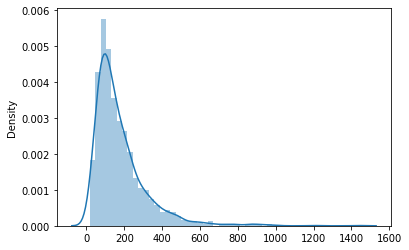

In [15]:
male_mfcc_length = [i.shape[1] for i in male_mfccs]
assert [i.shape[0] for i in male_mfccs] == [n_mfcc for i in male_mfccs]

# stats about length
male_mean = np.mean(male_mfcc_length)
male_mode = stats.mode(male_mfcc_length)
male_median = np.median(male_mfcc_length)
print('mean', np.mean(male_mfcc_length))
print('mode', stats.mode(male_mfcc_length))
print('median', np.median(male_mfcc_length))

# distribution of mfcc length
sns.distplot(male_mfcc_length)

mean 176.6294536817102
mode ModeResult(mode=array([60]), count=array([12]))
median 128.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


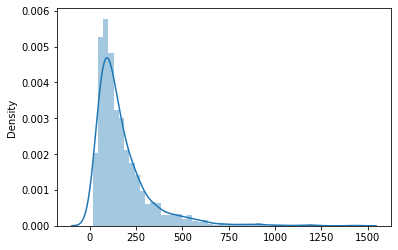

In [16]:
female_mfcc_length = [i.shape[1] for i in female_mfccs]
assert [i.shape[0] for i in female_mfccs] == [n_mfcc for i in female_mfccs]

# stats about length
female_mean = np.mean(female_mfcc_length)
female_mode = stats.mode(female_mfcc_length)
female_median = np.median(female_mfcc_length)
print('mean', np.mean(female_mfcc_length))
print('mode', stats.mode(female_mfcc_length))
print('median', np.median(female_mfcc_length))

# distribution of mfcc length
sns.distplot(female_mfcc_length)

mean 177.59433333333334
mode ModeResult(mode=array([79]), count=array([24]))
median 133.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


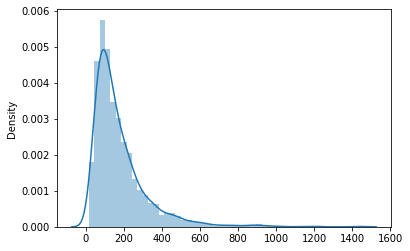

In [17]:
mfcc_length = [i.shape[1] for i in mfccs]
assert [i.shape[0] for i in mfccs] == [n_mfcc for i in mfccs]

# stats about length
mean = np.mean(mfcc_length)
mode = stats.mode(mfcc_length)
median = np.median(mfcc_length)
print('mean', np.mean(mfcc_length))
print('mode', stats.mode(mfcc_length))
print('median', np.median(mfcc_length))

# distribution of mfcc length
sns.distplot(mfcc_length)

In [18]:
len(mfccs)

3000

## Sample Output

In [ ]:
print(male_voice_label[877], male_voice_label[15])

4 0


In [ ]:
import IPython
IPython.display.Audio(f"dataset/male/{male_voice_dir[877]}")
# IPython.display.Audio(f"dataset/male/M03F01.wav")

## Padding

In [19]:
# size of the flattened mfcc features
male_mean_mfcc_size = int(n_mfcc * male_median)
female_mean_mfcc_size = int(n_mfcc * female_median)
mean_mfcc_size = int(n_mfcc * median)
print(mean_mfcc_size, female_mean_mfcc_size, male_mean_mfcc_size)

5320 5120 5520


mixture

In [20]:
minn=mfccs[0][0][0]
for i in mfccs:
  for j in i:
    for k in j:
      if (k<minn):
        minn=k

In [21]:
minn

-696.2844982228476

In [22]:
# padding and masking for mfcc features
mfccs_flatten = [mfcc.flatten()+700 for mfcc in mfccs] # make every 2D feature flatten and greater than zero
for i in range(len(mfccs_flatten)):
    # truncate longer sequences to the median length for sequences
    # so it wouldn't be the case that smaller seqs. get ignored.
    if len(mfccs_flatten[i]) > mean_mfcc_size:
        mfccs_flatten[i] = mfccs_flatten[i][:mean_mfcc_size]
padded_mfcc = tf.keras.preprocessing.sequence.pad_sequences(
    mfccs_flatten, padding='post'
)
# print(padded_mfcc[:10])

# output dimension assertion
assert [len(i) for i in padded_mfcc] == [len(padded_mfcc[0]) for i in padded_mfcc]
print(len(padded_mfcc[0]))

# masking layer (test)
# embedding = tf.keras.layers.Embedding(input_dim=1000, output_dim=16, mask_zero=True)
# masked_output = embedding(padded_mfcc)
# print(masked_output._keras_mask)

5320


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


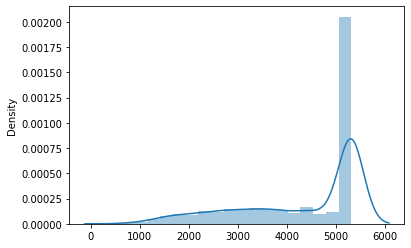

In [23]:
sns.distplot([len(i) for i in mfccs_flatten])

female

In [24]:
minn_female=female_mfccs[0][0][0]
for i in female_mfccs:
  for j in i:
    for k in j:
      if (k<minn_female):
        minn_female=k

In [25]:
minn_female

-665.4552153056302

In [26]:
# padding and masking for mfcc features
female_mfccs_flatten = [female_mfcc.flatten()+700 for female_mfcc in female_mfccs] # make every 2D feature flatten and greater than zero
for i in range(len(female_mfccs_flatten)):
    # truncate longer sequences to the median length for sequences
    # so it wouldn't be the case that smaller seqs. get ignored.
    if len(female_mfccs_flatten[i]) > mean_mfcc_size:
        female_mfccs_flatten[i] = female_mfccs_flatten[i][:mean_mfcc_size]
female_padded_mfcc = tf.keras.preprocessing.sequence.pad_sequences(
    female_mfccs_flatten, padding='post'
)
# print(padded_mfcc[:10])

# output dimension assertion
assert [len(i) for i in female_padded_mfcc] == [len(female_padded_mfcc[0]) for i in female_padded_mfcc]
print(len(female_padded_mfcc[0]))

# masking layer (test)
# embedding = tf.keras.layers.Embedding(input_dim=1000, output_dim=16, mask_zero=True)
# masked_output = embedding(padded_mfcc)
# print(masked_output._keras_mask)

5320


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


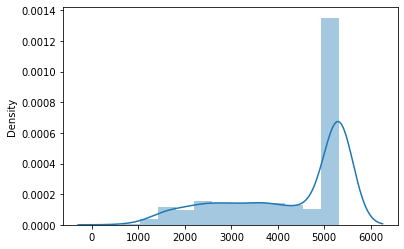

In [27]:
sns.distplot([len(i) for i in female_mfccs_flatten])

male

In [28]:
# padding and masking for mfcc features
male_mfccs_flatten = [male_mfcc.flatten()+700 for male_mfcc in male_mfccs] # make every 2D feature flatten and greater than zero
for i in range(len(male_mfccs_flatten)):
    # truncate longer sequences to the median length for sequences
    # so it wouldn't be the case that smaller seqs. get ignored.
    if len(male_mfccs_flatten[i]) > male_mean_mfcc_size:
        male_mfccs_flatten[i] = male_mfccs_flatten[i][:mean_mfcc_size]
male_padded_mfcc = tf.keras.preprocessing.sequence.pad_sequences(
    male_mfccs_flatten, padding='post'
)
# print(padded_mfcc[:10])

# output dimension assertion
assert [len(i) for i in male_padded_mfcc] == [len(male_padded_mfcc[0]) for i in male_padded_mfcc]
print(len(male_padded_mfcc[0]))

# masking layer (test)
# embedding = tf.keras.layers.Embedding(input_dim=1000, output_dim=16, mask_zero=True)
# masked_output = embedding(padded_mfcc)
# print(masked_output._keras_mask)

5520


In [29]:
print(len(female_voice_label), len(female_padded_mfcc), len(female_mfccs_flatten))

1263 1263 1263




# Some plotting

In [ ]:
import numpy as np
y1, sr1 = librosa.load('dataset/male/M01H01.wav', sr=44100)
y2, sr2 = librosa.load('dataset/male/M01N01.wav')
time = np.arange(0, len(y1))/sr1

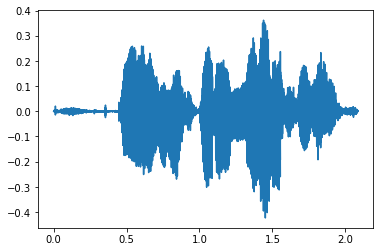

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, y1)

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:888: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  warnings.warn('power_to_db was called on complex input so phase '


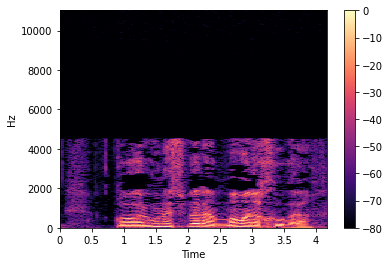

In [ ]:

D = librosa.stft(y1)
log_power = librosa.power_to_db(D**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='linear')
plt.colorbar()

[Text(0.5, 1.0, 'MFCC')]

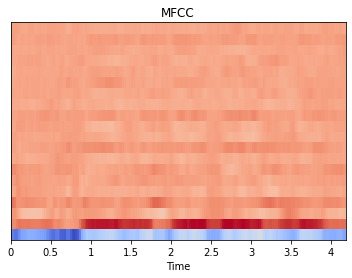

In [ ]:
mfc1 = librosa.feature.mfcc(y=y1, sr=sr1)
# mfc2 = librosa.feature.mfcc(y=y2, sr=sr2)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfc1, x_axis='time', ax=ax)
# fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

# Training

## training female and male data seperately

In [ ]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(male_padded_mfcc, male_voice_label, test_size=0.4)
y_train_m = np_utils.to_categorical(y_train_m, num_classes=len(emotion_classes))
y_test_m  = np_utils.to_categorical(y_test_m, num_classes=len(emotion_classes))
x_test_m, x_val_m, y_test_m, y_val_m = train_test_split(x_test_m, y_test_m, test_size=0.5)

In [ ]:
print(len(x_train), len(x_val), len(x_test))

1042 348 347


In [ ]:
y_train.shape

(1042, 6)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=40, mask_zero=True), 
    Bidirectional(LSTM(32, return_sequences=True)),
    LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(len(emotion_classes), activation='softmax')
])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_m, y_train_m, 
                    validation_data=(x_val_m, y_val_m),
                    callbacks=[early_stopping],
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS)

Epoch 1/5
17/17 [==============================] - 344s 20s/step - loss: 1.7423 - accuracy: 0.4404 - val_loss: 1.4837 - val_accuracy: 0.4224
Epoch 2/5
17/17 [==============================] - 332s 20s/step - loss: 1.4177 - accuracy: 0.4378 - val_loss: 1.4153 - val_accuracy: 0.4224
Epoch 3/5
17/17 [==============================] - 337s 20s/step - loss: 1.3116 - accuracy: 0.4395 - val_loss: 1.3497 - val_accuracy: 0.4224
Epoch 4/5
 1/17 [>.............................] - ETA: 5:16 - loss: 1.3462 - accuracy: 0.4375

## training mixed data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(padded_mfcc, voice_label, test_size=0.4 ,shuffle=True)
y_train = np_utils.to_categorical(y_train, num_classes=len(emotion_classes))
y_test  = np_utils.to_categorical(y_test, num_classes=len(emotion_classes))
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [31]:
print(len(x_train), len(x_val), len(x_test))

1800 600 600


In [32]:
y_train.shape

(1800, 6)

In [48]:
from tensorflow.keras.layers import Bidirectional, LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=40, mask_zero=True), 
    Bidirectional(LSTM(32, return_sequences=True)),
    LSTM(32),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(emotion_classes), activation='sigmoid')
])

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

In [50]:
from tensorflow import keras
BATCH_SIZE = 64
EPOCHS = 10
opt=keras.optimizers.SGD(learning_rate=0.01,momentum=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping],
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS)

Epoch 1/5
29/29 [==============================] - 397s 13s/step - loss: 1.7174 - accuracy: 0.3396 - val_loss: 1.4542 - val_accuracy: 0.3450
Epoch 2/5
29/29 [==============================] - 393s 14s/step - loss: 1.4693 - accuracy: 0.3465 - val_loss: 1.4182 - val_accuracy: 0.3450
Epoch 3/5
29/29 [==============================] - 393s 14s/step - loss: 1.4710 - accuracy: 0.3545 - val_loss: 1.4137 - val_accuracy: 0.3450
Epoch 4/5
29/29 [==============================] - 398s 14s/step - loss: 1.4879 - accuracy: 0.3340 - val_loss: 1.4110 - val_accuracy: 0.3783


## training a network for each class of feelings

In [ ]:
padded_mfcc0=[]
voice_label0=[]
padded_mfcc1=[]
voice_label1=[]
padded_mfcc2=[]
voice_label2=[]
padded_mfcc3=[]
voice_label3=[]
padded_mfcc4=[]
voice_label4=[]
padded_mfcc5=[]
voice_label5=[]
for i in range(len(voice_label)):
  label = voice_label[i]
  if label==0:
    padded_mfcc0.append(padded_mfcc[i])
    voice_label0.append(1)
  else:
    padded_mfcc0.append(padded_mfcc[i])
    voice_label0.append(0)
  if label==1:
    padded_mfcc1.append(padded_mfcc[i])
    voice_label1.append(1)
  else:
    padded_mfcc1.append(padded_mfcc[i])
    voice_label1.append(0)
  if label==2:
    padded_mfcc2.append(padded_mfcc[i])
    voice_label2.append(1)
  else:
    padded_mfcc2.append(padded_mfcc[i])
    voice_label2.append(0)
  if label==3:
    padded_mfcc3.append(padded_mfcc[i])
    voice_label3.append(1)
  else:
    padded_mfcc3.append(padded_mfcc[i])
    voice_label3.append(0)
  if label==4:
    padded_mfcc4.append(padded_mfcc[i])
    voice_label4.append(1)
  else:
    padded_mfcc4.append(padded_mfcc[i])
    voice_label4.append(0)
  if label==5:
    padded_mfcc5.append(padded_mfcc[i])
    voice_label5.append(1)
  else:
    padded_mfcc5.append(padded_mfcc[i])
    voice_label5.append(0)

emotion 0 network

In [ ]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(padded_mfcc0, voice_label0, test_size=0.4 ,shuffle=True)
y_train0 = np_utils.to_categorical(y_train0)
y_test0  = np_utils.to_categorical(y_test0)
x_test0, x_val0, y_test0, y_val0 = train_test_split(x_test0, y_test0, test_size=0.5)

In [ ]:
print(len(x_train), len(x_val), len(x_test))

1800 600 600


In [ ]:
y_train.shape

(1800, 6)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=40, mask_zero=True), 
    Bidirectional(LSTM(32, return_sequences=True)),
    LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(len(emotion_classes), activation='softmax')
])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping],
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS)

Epoch 1/5
 6/29 [=====>........................] - ETA: 4:48 - loss: 1.7852 - accuracy: 0.2505